In [2]:
% matplotlib inline
import numpy as np

# Load the dataset
test = np.loadtxt('test.csv', delimiter=',')
train = np.loadtxt('train.csv', delimiter=',')
# split both sets into X (input / data) and Y (output / lables) parts
data = np.array(train)[:,0:2]
labels = np.array(train)[:,2]

d_test = np.array(test)[:,0:2]
l_test = np.array(test)[:,2]


In [3]:

import torch 
import torch.nn.functional as F
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

torch.set_default_tensor_type('torch.FloatTensor')


number_of_residual_blocks = 3 #for each block we have two block, that leaves us with 2*nrb + 1 layer
# \etha
learning_rate = 0.01
#

#number of iterations before calculating the error
print_every_iter = 100
m=10

# Define our deep Ritz network model
class DeepRitzNet(torch.nn.Module):
    def __init__(self, m):
        super(DeepRitzNet, self).__init__()
        #self.layers = []
        #for i in range(2*number_of_residual_blocks):
        #    self.layers.append(torch.nn.Linear(m,m))
        
        #self.layers.append(torch.nn.Linear(m,1))
        self.linear1 = torch.nn.Linear(m,m)
        self.linear2 = torch.nn.Linear(m,m)
        self.linear3 = torch.nn.Linear(m,m)
        self.linear4 = torch.nn.Linear(m,m)
        self.linear5 = torch.nn.Linear(m,m)
        self.linear6 = torch.nn.Linear(m,m)
        
        self.linear7 = torch.nn.Linear(m,1)
        
    def forward(self, x):
        y = x
        #for i in range(number_of_residual_blocks-1):
        #    y = y+ F.relu(self.layers[i+1](F.relu(self.layers[i])))
        #output = F.relu(self.linear[number_of_residual_blocks+1](y))
        y = y + F.relu(self.linear2(F.relu(self.linear1(y)**3))**3)
        y = y + F.relu(self.linear4(F.relu(self.linear3(y)**3))**3)
        y = y + F.relu(self.linear6(F.relu(self.linear5(y)**3))**3)
        output = F.relu(self.linear7(y)**3)
        return output

In [4]:

model = DeepRitzNet(m)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

xs = torch.tensor(data[:,0])
ys = torch.tensor(data[:,1])

xl = len(xs)

lr1 = 0.01
lr2 = 0.005

optimizer1 = torch.optim.Adam(model.parameters(), lr=lr1)
optimizer2 = torch.optim.Adam(model.parameters(), lr=lr2)


In [9]:
iterations = 50  #default 10000
# Training
for k in range(iterations):
    loss = torch.zeros(1)
    for i in range(len(xs)):      
        x_input = np.zeros(m)
        x_input[0] = xs[i]
        x_input[1] = ys[i]

        x_input = torch.tensor(x_input).float()
        #y = model(x_input)
        y=labels[i]
        #Note that here we do the zero padding!
        x1 = torch.zeros(m)
        x2 = torch.zeros(m)
        x1[0] = 0.0001
        x2[1] = 0.0001
        x_input_1 = x_input.float() + x1 # E
        x_input_2 = x_input.float() + x2 # N
        x_input_3 = x_input.float() - x1 # W
        x_input_4 = x_input.float() - x2 # S
        #the two point formula to approximate the derivative:
        # f'(x) = f(x+h)-x/h
        
        # WRT x
        #x_input_grad_1 = (model(x_input_1) - y) / 0.0001 
        # WRT y
        #x_input_grad_2 = (model(x_input_2) - y) / 0.0001
        #the two point formula for approximating the second derivative
        #f''(x) = f(x+h) -2*f(x) - f(x-h) / h^2
        
        # WRT x
        x_input_2_grad_x = (model(x_input_1) + model(x_input_3) - 2 * y) / 0.0001**2
        
        # WRT y
        x_input_2_grad_y = (model(x_input_2) + model(x_input_4) - 2 * y) / 0.0001**2

        # loss = 1/N\sigma_{j=1}^{N} 1/2 * |\nabla(u)| - f * u   (f=1) 
        loss += 0.5 * ((x_input_2_grad_y) ** 2 + (x_input_2_grad_x) ** 2) - y
        #print(loss)
                
    loss /= (xl)

    print(k, " epoch, loss: ", loss.data[0].numpy())

    
    #and step the optimizer
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    loss.backward()
    if k < 270:
        optimizer1.step()
    else:
        optimizer2.step()

(0, ' epoch, loss: ', array(2722956.5, dtype=float32))
(1, ' epoch, loss: ', array(2722956.5, dtype=float32))
(2, ' epoch, loss: ', array(2722956.5, dtype=float32))
(3, ' epoch, loss: ', array(2722956.5, dtype=float32))
(4, ' epoch, loss: ', array(2722956.5, dtype=float32))
(5, ' epoch, loss: ', array(2722956.5, dtype=float32))
(6, ' epoch, loss: ', array(2722956.5, dtype=float32))
(7, ' epoch, loss: ', array(2722956.5, dtype=float32))
(8, ' epoch, loss: ', array(2722956.5, dtype=float32))
(9, ' epoch, loss: ', array(2722956.5, dtype=float32))
(10, ' epoch, loss: ', array(2722956.5, dtype=float32))
(11, ' epoch, loss: ', array(2722956.5, dtype=float32))
(12, ' epoch, loss: ', array(2722956.5, dtype=float32))
(13, ' epoch, loss: ', array(2722956.5, dtype=float32))
(14, ' epoch, loss: ', array(2722956.5, dtype=float32))
(15, ' epoch, loss: ', array(2722956.5, dtype=float32))
(16, ' epoch, loss: ', array(2722956.5, dtype=float32))
(17, ' epoch, loss: ', array(2722956.5, dtype=float32))
(1

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
def plot_surface(data,title=""):
    Xs = data[:,0]
    Ys = data[:,1]
    Zs = data[:,2]
    N = data.shape[0]

    ## plotting surface using X, Y and Z given as 1D data:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.jet, linewidth=0)
    fig.colorbar(surf)

    title = ax.set_title(title)
    title.set_y(1.01)

    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(6))
    ax.zaxis.set_major_locator(MaxNLocator(5))



    fig.tight_layout()
    fig.savefig('3D-reconstructing-{}.png'.format(N))
    plt.show()

In [11]:

dt=torch.tensor(test)
predictions = []
for i in range(dt.size()[0]):  
    re = np.zeros(m)
    re[0] = dt[i,0]
    re[1] = dt[i,1]
    re = torch.tensor(re) 
    #is this line correct?! I dont think so!
    predictions.append(model(re.float()).item())#+test[i,2])

data_to_plot = dt
predictions = torch.tensor(predictions) 
for i in range(dt.size()[0]):
    data_to_plot[i,2]=predictions[i]

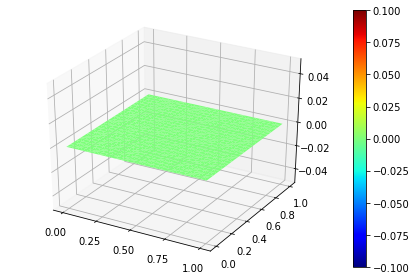

In [12]:
np.savetxt('gnuformatted_prediction.csv', data_to_plot, delimiter=',')
# gnuplot -c plot gnuformatted_prediction.csv "dudedudedue.png"
plot_surface(data_to_plot)

In [ ]:
#np.where((data[:,0]== 1)&(data[:,1]==1))